In [1]:
#import libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
#setting crypto assets
my_btc = 1.2
my_etc = 5.3

In [4]:
#Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
etc_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_data = requests.get(btc_url)
etc_data = requests.get(etc_url)

In [6]:
print(btc_data)
print(etc_data)

<Response [200]>
<Response [200]>


In [7]:
btc_content= btc_data.content
etc_content = etc_data.content

btc_data1= btc_data.json()
etc_data1= etc_data.json()

In [8]:
import json

print(json.dumps(btc_data1, indent=4))
print(json.dumps(etc_data1, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18559062,
            "total_supply": 18559062,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 19393.9,
                    "volume_24h": 35611890743,
                    "market_cap": 360223416160,
                    "percentage_change_1h": -0.0616330466967851,
                    "percentage_change_24h": 4.41826416195912,
                    "percentage_change_7d": 5.62729369826928,
                    "percent_change_1h": -0.0616330466967851,
                    "percent_change_24h": 4.41826416195912,
                    "percent_change_7d": 5.62729369826928
                },
                "CAD": {
                    "price": 25155.82769,
                    "volume_24h": 46192183482.7453,
                  

In [39]:
#fetch current Btc price
btc_usd = {
                    "price": 19158.88,
                    "volume_24h": 27148321725,
                    "market_cap": 355559700150,
                    "percentage_change_1h": 1.64461540692228,
                    "percentage_change_24h": 5.62314404835784,
                    "percentage_change_7d": 4.17749886250368,
                    "percent_change_1h": 1.64461540692228,
                    "percent_change_24h": 5.62314404835784,
                    "percent_change_7d": 4.17749886250368
                }
btc_price= btc_usd['price']

#fetch current ETC price
etc_usd = {
                    "price": 600.89,
                    "volume_24h": 14782215913,
                    "market_cap": 68611165139,
                    "percentage_change_1h": 0.792630072689559,
                    "percentage_change_24h": 8.11012972542828,
                    "percentage_change_7d": 7.20523529207363,
                    "percent_change_1h": 0.792630072689559,
                    "percent_change_24h": 8.11012972542828,
                    "percent_change_7d": 7.20523529207363
                }
etc_price = etc_usd['price']

jointed_assest_price= etc_price + btc_price

In [40]:
#crypto wallet balance
print(f"The current value of your {my_btc} BTC is {btc_price:0.2f}")
print(f"The current value of your {my_etc} ETC is {etc_price:0.2f}")

The current value of your 1.2 BTC is 19158.88
The current value of your 5.3 ETC is 600.89


In [41]:
#Collecting Investment Data

#setiing share amounts
my_agg= 200
my_spy= 50

In [42]:
#setting Alpaca Keys
alpac_secret= '30wz1Gc3bRbVip224WyV84kL0GmhXoB9WGmqaN5B'
alpac_api= 'PKY3AMIZ2X7N1OFKKNCL'
APCA_API_URL = "https://datq.alpaca.markets/v1"

alpaca= tradeapi.REST(alpac_api,
                           alpac_secret,
                           api_version="v2")

In [43]:
#Setting the iso format for dataframe
today = pd.Timestamp("2020-11-30", tz="America/New_York").isoformat()

In [44]:
tickers = ["AGG", "SPY"]

timeframe= '1D'

In [45]:
invest_port = alpaca.get_barset(tickers,
                               timeframe,
                               start= today,
                               end= today).df

In [46]:
invest_port

AGG                                     SPY  \
                             open    high     low  close   volume    open   
2020-11-30 00:00:00-05:00  118.32  118.45  118.25  118.4  5231566  362.83   

                                                           
                             high     low close    volume  
2020-11-30 00:00:00-05:00  363.12  359.17   362  67154075

In [47]:
invest_port_closing = pd.DataFrame()

invest_port_closing['AGG']= invest_port['AGG']['close']
invest_port_closing['SPY']= invest_port['SPY']['close']

invest_port_closing.index = invest_port_closing.index.date

print(invest_port_closing)
print(invest_port_closing['AGG'])
print(invest_port_closing['SPY'])

              AGG  SPY
2020-11-30  118.4  362
2020-11-30    118.4
Name: AGG, dtype: float64
2020-11-30    362
Name: SPY, dtype: int64


In [48]:
#Calculating the shares for AGG and SPY
agg_shares = 118.31 * my_agg
spy_shares = 359.99 * my_spy
joint_shares = agg_shares + spy_shares

print(f"${joint_shares}")
print(f"The current value of your 200 AGG shares is ${agg_shares}")
print(f"the current value of your 50 SPY shares is ${spy_shares}")

$41661.5
The current value of your 200 AGG shares is $23662.0
the current value of your 50 SPY shares is $17999.5


In [50]:
#saving health Analysis
monthly_income= 12000

data2= {'default': ['Crypto','shares'], "Amount": [jointed_assest_price, joint_shares]}
savings_df = pd.DataFrame(data2, columns =['Amount'], index= ['Crypto', 'shares'])

display(savings_df)

,Amount
Crypto,19759.77
shares,41661.50


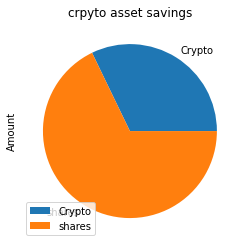

In [53]:
savings_df.plot.pie(y='Amount', title='crpyto asset savings')

In [20]:
# set emergency fund
emergency_fund = monthly_income * 3

#calculating savings
total_funds= emergency_fund - joint_shares



In [21]:
#Monte CArlo simulation 5 year
start_date = pd.Timestamp('2015-11-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-30', tz='America/New_York').isoformat()

In [22]:
invest_port2 = alpaca.get_barset(tickers,timeframe, start= start_date, end= end_date).df

display(invest_port2)

AGG                                       \
                             open      high       low   close   volume   
2015-11-30 00:00:00-05:00  108.83  108.8700  108.7700  108.80  1797166   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.4300  108.84  4094809   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.6100  108.69  2310790   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.8100  107.89  4334029   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.0000  108.24  2058997   
...                           ...       ...       ...     ...      ...   
2020-11-23 00:00:00-05:00  118.28  118.3000  118.1734  118.27  3844326   
2020-11-24 00:00:00-05:00  118.24  118.2800  118.0700  118.09  4113975   
2020-11-25 00:00:00-05:00  118.15  118.2100  118.0200  118.08  3739909   
2020-11-27 00:00:00-05:00  118.25  118.2850  118.2200  118.27  4646812   
2020-11-30 00:00:00-05:00  118.32  118.4500  118.2500  118.40  5231566   

                              SPY                                        
                             open     high       low   close     volume  
2015-11-30 00:00:00-05:00  209.75  209.890  208.5600  208.67   78967202  
2015-12-01 00:00:00-05:00  209.44  210.820  209.1100  210.74   80426519  
2015-12-02 00:00:00-05:00  210.61  211.000  208.2300  208.50   88408000  
2015-12-03 00:00:00-05:00  208.83  209.150  204.7511  205.60  125709867  
2015-12-04 00:00:00-05:00  206.08  209.970  205.9300  209.63  138261490  
...                           ...      ...       ...     ...        ...  
2020-11-23 00:00:00-05:00  357.28  358.790  354.8650  357.47   49938331  
2020-11-24 00:00:00-05:00  360.21  363.805  359.2900  363.19   49862168  
2020-11-25 00:00:00-05:00  363.13  363.160  361.4800  362.65   35309156  
2020-11-27 00:00:00-05:00  363.84  364.180  362.5800  363.65   46840189  
2020-11-30 00:00:00-05:00  362.83  363.120  359.1700  362.00   67154075  

[1260 rows x 10 columns]

In [23]:
#Monte Carlo simulation
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [24]:
#setting up the parameters and running the cumulative return for the 500 simulations/5year
Monty_fiveY = MCSimulation(portfolio_data =invest_port2,
                          weights= [.40,.60],
                          num_simulation = 500, num_trading_days = 252*5)

In [25]:
Monty_fiveY

In [26]:
Monty_fiveY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994255,0.991003,0.994447,0.998420,0.993334,0.989511,0.996031,0.992574,0.998271,1.000083,...,0.991896,0.986346,1.006048,0.997242,0.994921,1.006286,1.007339,1.003608,0.998103,1.005214
2,0.990052,0.993313,0.983127,0.987765,0.992804,0.988077,1.008595,0.994831,0.996915,1.011748,...,0.992075,0.981284,1.022286,1.008584,0.999649,1.004713,1.013752,1.010149,1.004712,1.007450
3,0.990049,0.998183,0.984073,0.988968,1.005284,0.977482,1.003006,1.009081,0.992071,1.025681,...,0.979177,0.984555,1.027920,1.013952,1.007481,1.008797,1.015728,1.020314,0.996212,1.012273
4,0.982084,0.996563,0.988536,0.984423,1.004809,0.983230,1.000716,1.001157,0.982846,1.024504,...,0.994591,0.980510,1.033213,1.021748,1.008968,1.012615,1.031163,1.020855,0.990502,1.004947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.562355,2.848171,1.285515,1.828934,1.546924,1.867772,2.149051,1.690750,1.394183,1.329611,...,1.467973,0.766606,2.311712,1.444657,1.476650,2.412614,1.397087,1.728614,0.750459,0.972732
1257,1.572814,2.854504,1.273616,1.839556,1.551551,1.855938,2.154752,1.692725,1.396556,1.332717,...,1.470063,0.762069,2.311855,1.443679,1.492573,2.416280,1.400443,1.704234,0.754426,0.977067
1258,1.570804,2.862250,1.280380,1.844796,1.530493,1.875340,2.169202,1.695775,1.394756,1.317649,...,1.461688,0.772822,2.322133,1.440837,1.501478,2.442526,1.392675,1.680839,0.763581,0.977428
1259,1.559974,2.879922,1.284825,1.822938,1.544850,1.873350,2.184575,1.672837,1.403072,1.317961,...,1.456310,0.770705,2.328205,1.421940,1.476515,2.441346,1.394015,1.687948,0.764073,0.993083


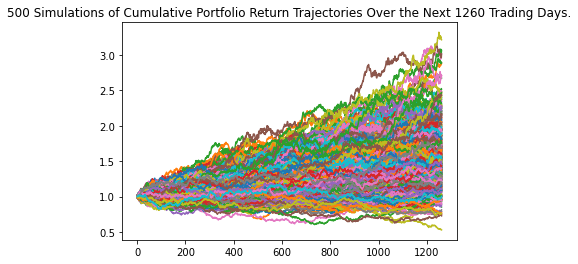

In [27]:
#line grapgh showing the 500 simulations in 5 year period
line_graph = Monty_fiveY.plot_simulation()

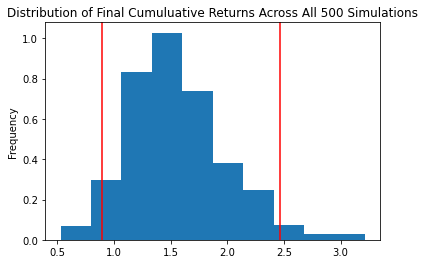

In [28]:
#Histograph of 500 simulations in 5 year interval
Hist_graph = Monty_fiveY.plot_distribution()

In [29]:
table_summary = Monty_fiveY.summarize_cumulative_return()
print(table_summary)

count           500.000000
mean              1.556812
std               0.419560
min               0.529180
25%               1.272936
50%               1.524412
75%               1.786777
max               3.214481
95% CI Lower      0.894877
95% CI Upper      2.469782
Name: 1260, dtype: float64


In [30]:
#Monte Carlo Simulation 30 years
start_date2 = pd.Timestamp('2015-11-30', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2045-11-30', tz='America/New_York').isoformat()

In [31]:
invest_port3 = alpaca.get_barset(tickers,timeframe, start= start_date2, end= end_date2).df

display(invest_port3)

AGG                                       \
                             open      high       low   close   volume   
2015-11-30 00:00:00-05:00  108.83  108.8700  108.7700  108.80  1797166   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.4300  108.84  4094809   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.6100  108.69  2310790   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.8100  107.89  4334029   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.0000  108.24  2058997   
...                           ...       ...       ...     ...      ...   
2020-11-23 00:00:00-05:00  118.28  118.3000  118.1734  118.27  3844326   
2020-11-24 00:00:00-05:00  118.24  118.2800  118.0700  118.09  4113975   
2020-11-25 00:00:00-05:00  118.15  118.2100  118.0200  118.08  3739909   
2020-11-27 00:00:00-05:00  118.25  118.2850  118.2200  118.27  4646812   
2020-11-30 00:00:00-05:00  118.32  118.4500  118.2500  118.40  5231566   

                              SPY                                        
                             open     high       low   close     volume  
2015-11-30 00:00:00-05:00  209.75  209.890  208.5600  208.67   78967202  
2015-12-01 00:00:00-05:00  209.44  210.820  209.1100  210.74   80426519  
2015-12-02 00:00:00-05:00  210.61  211.000  208.2300  208.50   88408000  
2015-12-03 00:00:00-05:00  208.83  209.150  204.7511  205.60  125709867  
2015-12-04 00:00:00-05:00  206.08  209.970  205.9300  209.63  138261490  
...                           ...      ...       ...     ...        ...  
2020-11-23 00:00:00-05:00  357.28  358.790  354.8650  357.47   49938331  
2020-11-24 00:00:00-05:00  360.21  363.805  359.2900  363.19   49862168  
2020-11-25 00:00:00-05:00  363.13  363.160  361.4800  362.65   35309156  
2020-11-27 00:00:00-05:00  363.84  364.180  362.5800  363.65   46840189  
2020-11-30 00:00:00-05:00  362.83  363.120  359.1700  362.00   67154075  

[1260 rows x 10 columns]

In [32]:
#Running the calculation for returns and setting the parameters for 30 year simulation
Monty_thirtyY = MCSimulation(portfolio_data =invest_port3,
                          weights= [.40,.60],
                          num_simulation = 500, num_trading_days = 252*30)

In [33]:
Monty_thirtyY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999453,0.998978,0.994745,1.011421,0.998902,1.005713,0.985248,1.010675,1.006162,1.005909,...,0.997832,1.005854,1.006003,1.012020,0.993385,0.999826,0.998289,1.006258,0.982472,1.009056
2,1.007647,0.992074,0.990167,1.009942,1.003508,0.997737,0.987983,1.000189,1.005262,1.013883,...,0.996898,1.004557,1.010747,1.015227,0.999043,0.998970,1.014093,1.011180,0.974742,0.995988
3,1.019528,0.991940,0.981132,1.020236,0.996316,1.003021,0.988766,1.020091,1.002552,1.013144,...,0.998702,1.007381,1.015801,1.013929,0.998556,0.991602,1.007447,1.018683,0.964961,0.998097
4,1.025031,0.997704,0.973600,1.027316,0.995702,1.007238,0.991725,1.022562,1.009190,1.012750,...,0.997084,1.021106,1.010176,1.013377,1.008566,0.993464,0.991388,1.009684,0.972795,1.011251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.046332,8.227744,9.821034,26.966143,15.383089,4.023317,6.938898,3.980596,9.189658,8.900098,...,8.492733,3.725372,26.588445,10.886634,17.430840,53.055382,8.924156,10.961949,12.003071,13.587363
7557,15.036783,8.248039,9.691067,27.124562,15.349066,4.008407,6.892461,3.981775,9.165784,8.859276,...,8.475312,3.678101,26.488696,10.943772,17.412112,53.120371,8.997090,11.096356,12.137696,13.356674
7558,14.820023,8.321004,9.524246,26.866422,15.190355,4.000478,6.922367,3.962045,9.152766,8.876546,...,8.538865,3.657917,26.425305,10.993038,17.394632,52.852086,9.102130,11.035027,12.151319,13.503528
7559,14.750171,8.339755,9.463982,26.879949,15.287292,4.000960,6.857494,3.981577,9.160895,8.904090,...,8.434481,3.693371,26.521867,10.931661,17.378031,52.896139,9.026441,11.084613,12.200716,13.250754


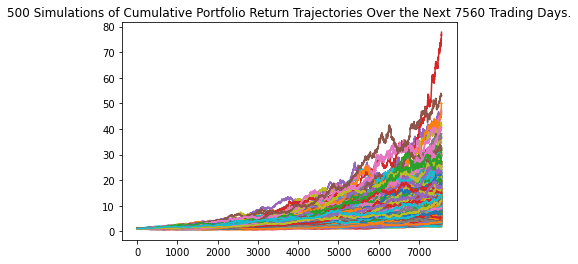

In [34]:
#Line graph of 500 simulations over 30 years
line_graph2 = Monty_thirtyY.plot_simulation()

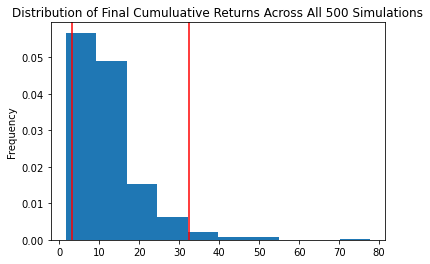

In [35]:
#Histograph of 500 simulations over 30 years
hist_graph2 = Monty_thirtyY.plot_distribution()

In [36]:
table_summary2 = Monty_thirtyY.summarize_cumulative_return()
table_summary2

count           500.000000
mean             12.202248
std               8.338402
min               1.608892
25%               6.772262
50%              10.317974
75%              14.923010
max              77.759965
95% CI Lower      3.097273
95% CI Upper     32.380562
Name: 7560, dtype: float64

In [37]:
#calulating epected portfolio return at 95% lower and upper confidence intervals based on a $20,000 investment

#set initial investment
initial_investment = 20000

ci_lower = table_summary2['95% CI Lower'] * initial_investment
ci_higher = table_summary2['95% CI Upper'] *initial_investment

print(f"There is a 95% chance that an initial investment of {initial_investment} in the portfolio"
     f"over the next 30 years will end within the range of {ci_lower.round(2)} and {ci_higher.round(2)}")

There is a 95% chance that an initial investment of 20000 in the portfolioover the next 30 years will end within the range of 61945.46 and 647611.24


In [38]:
#set initial investment
initial_investment2 = 20000 * 1.5

ci_lower = table_summary2['95% CI Lower'] * initial_investment
ci_higher = table_summary2['95% CI Upper'] *initial_investment

print(f"There is a 95% chance that an initial investment of {initial_investment} in the portfolio"
     f"over the next 30 years will end within the range of {ci_lower.round(2)} and {ci_higher.round(2)}")

There is a 95% chance that an initial investment of 20000 in the portfolioover the next 30 years will end within the range of 61945.46 and 647611.24
